In [1]:
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt

In [2]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))


TensorFlow version: 2.1.0
Eager execution: True


In [3]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))


8192/2194 [================================================================================================================] - 0s 3us/step
Local copy of the dataset file: /home/cooper-cooper/.keras/datasets/iris_training.csv


In [11]:
! head -n5 {train_dataset_fp}


120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [17]:
import numpy as np
import pandas as pd

data = pd.read_csv(train_dataset_fp)

In [19]:
data.columns

Index(['120', '4', 'setosa', 'versicolor', 'virginica'], dtype='object')

In [33]:
for k in data.columns[2:5]:
    print("column: ",k)
    print("mean: ", data[k].mean())
    print("min-max: ", data[k].min(), "-", data[k].max())
    print()

column:  setosa
mean:  3.739166666666667
min-max:  1.0 - 6.9

column:  versicolor
mean:  1.1966666666666665
min-max:  0.1 - 2.5

column:  virginica
mean:  1.0
min-max:  0 - 2



In [32]:
data["setosa"].max()

6.9

Notice above is wrong!

In [34]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))


Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [35]:
    train_dataset_fp

'/home/cooper-cooper/.keras/datasets/iris_training.csv'

In [36]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']


In [52]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=2)

In [53]:
features, labels = next(iter(train_dataset))

print(features)


OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6.9, 5.7, 5.5, 5. , 5.9, 6.9, 5.5, 5.1, 5.2, 7.2, 4.7, 5. , 6.2,
       7.7, 5. , 4.9, 7.4, 5.4, 4.9, 4.8, 5.8, 5.8, 6.5, 6.3, 6.1, 5.4,
       5. , 5. , 5.7, 6. , 7.3, 4.4], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.2, 2.8, 3.5, 3.5, 3.2, 3.1, 2.4, 3.8, 2.7, 3.6, 3.2, 3.4, 2.8,
       2.6, 3. , 2.5, 2.8, 3.9, 3.1, 3. , 2.8, 4. , 3.2, 2.3, 3. , 3.7,
       3.6, 2. , 4.4, 2.7, 2.9, 3. ], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.7, 4.1, 1.3, 1.3, 4.8, 4.9, 3.7, 1.5, 3.9, 6.1, 1.3, 1.6, 4.8,
       6.9, 1.6, 4.5, 6.1, 1.7, 1.5, 1.4, 5.1, 1.2, 5.1, 4.4, 4.9, 1.5,
       1.4, 3.5, 1.5, 5.1, 6.3, 1.3], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.3, 1.3, 0.2, 0.3, 1.8, 1.5, 1. , 0.3, 1.4, 2.5, 0.2, 0.4, 1.8,
       2.3, 0.2, 1.7, 1.9, 0.4, 0.1, 0.1, 2.4, 0.2, 2. , 1.3,

In [55]:
for i,k in enumerate(train_dataset):
    print(i)

0
1
2
3
4
5
6
7


In [ ]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=2)

In [84]:
feat, lab = next(iter(train_dataset))

In [85]:
feat.keys()

odict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [88]:
for k in feat.items():
    print(k)

('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5. , 4.9, 5.2, 5.5, 7.4, 4.8, 7. , 6.7, 6.9, 6. , 4.6, 6.3, 5. ,
       5.7, 4.8, 7.2, 6.1, 4.8, 5.1, 5.8, 5.1, 5.6, 6.5, 6.8, 5.4, 7.7,
       7.7, 5.1, 5.6, 5. , 7.7, 6.4], dtype=float32)>)
('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.4, 3.1, 3.4, 2.4, 2.8, 3.4, 3.2, 3.3, 3.2, 2.7, 3.6, 2.3, 2. ,
       2.8, 3. , 3. , 2.6, 3.1, 3.8, 2.7, 3.7, 2.9, 3. , 3.2, 3.7, 3.8,
       2.8, 3.5, 2.7, 3.3, 2.6, 3.2], dtype=float32)>)
('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.5, 1.5, 1.4, 3.7, 6.1, 1.6, 4.7, 5.7, 5.7, 5.1, 1. , 4.4, 3.5,
       4.5, 1.4, 5.8, 5.6, 1.6, 1.9, 4.1, 1.5, 3.6, 5.8, 5.9, 1.5, 6.7,
       6.7, 1.4, 4.2, 1.4, 6.9, 5.3], dtype=float32)>)
('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.2, 0.1, 0.2, 1. , 1.9, 0.2, 1.4, 2.1, 2.3, 1.6, 0.2, 1.3, 1. ,
       1.3, 0.3, 1.6, 1.4, 0.2, 0.4, 1. , 0.4, 1.3, 2.2, 2.3, 0.2, 2.2,
     

In [76]:
feat.keys()

odict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [83]:
ff

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

W0322 18:11:38.569694 140131307001664 legend.py:1282] No handles with labels found to put in legend.


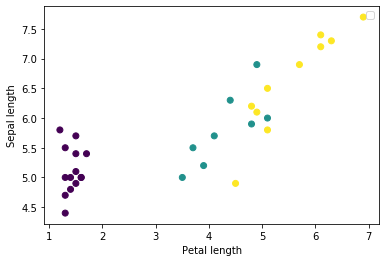

In [90]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()


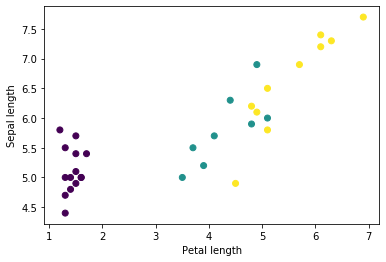

In [96]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()


In [97]:
labels

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([2, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0,
       2, 1, 2, 0, 0, 1, 0, 1, 2, 0], dtype=int32)>

In [105]:
tf.stack(list(features.values()), axis=1)

<tf.Tensor: shape=(32, 4), dtype=float32, numpy=
array([[6.9, 3.2, 5.7, 2.3],
       [5.7, 2.8, 4.1, 1.3],
       [5.5, 3.5, 1.3, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.9, 3.2, 4.8, 1.8],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.4, 3.7, 1. ],
       [5.1, 3.8, 1.5, 0.3],
       [5.2, 2.7, 3.9, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [4.7, 3.2, 1.3, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [6.2, 2.8, 4.8, 1.8],
       [7.7, 2.6, 6.9, 2.3],
       [5. , 3. , 1.6, 0.2],
       [4.9, 2.5, 4.5, 1.7],
       [7.4, 2.8, 6.1, 1.9],
       [5.4, 3.9, 1.7, 0.4],
       [4.9, 3.1, 1.5, 0.1],
       [4.8, 3. , 1.4, 0.1],
       [5.8, 2.8, 5.1, 2.4],
       [5.8, 4. , 1.2, 0.2],
       [6.5, 3.2, 5.1, 2. ],
       [6.3, 2.3, 4.4, 1.3],
       [6.1, 3. , 4.9, 1.8],
       [5.4, 3.7, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5. , 2. , 3.5, 1. ],
       [5.7, 4.4, 1.5, 0.4],
       [6. , 2.7, 5.1, 1.6],
       [7.3, 2.9, 6.3, 1.8],
       [4.4, 3. , 1.3, 0.2]], dtype=float32)>

In [106]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [107]:
train_dataset = train_dataset.map(pack_features_vector)


In [128]:
features, labels = next(iter(train_dataset))

In [110]:
ff

<tf.Tensor: shape=(32, 4), dtype=float32, numpy=
array([[6.6, 3. , 4.4, 1.4],
       [5.6, 2.7, 4.2, 1.3],
       [4.9, 2.5, 4.5, 1.7],
       [6.5, 2.8, 4.6, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [6.1, 2.6, 5.6, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.9, 3.2, 4.8, 1.8],
       [4.9, 3.1, 1.5, 0.1],
       [6.4, 2.8, 5.6, 2.1],
       [5.4, 3. , 4.5, 1.5],
       [6. , 2.2, 5. , 1.5],
       [4.6, 3.6, 1. , 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [4.4, 2.9, 1.4, 0.2],
       [7.2, 3.6, 6.1, 2.5],
       [5. , 3.3, 1.4, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.4, 1.4, 0.2],
       [6.1, 2.8, 4.7, 1.2],
       [6.3, 2.7, 4.9, 1.8],
       [5.4, 3.9, 1.7, 0.4],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [5. , 3. , 1.6, 0.2],
       [6.3, 3.3, 4.7, 1.6],
       [6.8, 3.2, 5.9, 2.3],
       [6.1, 3. , 4.9, 1.8],
       [6.5, 3. , 5.8, 2.2],
       [6.1, 2.8, 4. , 1.3],
       [7.7, 2.6, 6.9, 2.3],
       [5.9, 3. , 5.1, 1.8]], dtype=float32)>

In [113]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])


In [122]:
preds = model(ff)
tf.nn.softmax(preds)[0].numpy().sum()

1.0

In [126]:
print("Prediction: {}".format(tf.argmax(preds, axis=1)))
print("    Labels: {}".format(ii))


Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
    Labels: [1 1 2 1 1 2 0 1 0 2 1 2 0 2 0 2 0 0 0 1 2 0 2 1 0 1 2 2 2 1 2 2]


In [127]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [130]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))


Loss test: 2.3887667655944824


In [134]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense(32))
 |  model.add(Dense(32))
 |  model.co

In [135]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)


In [136]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)


In [143]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))


Step: 6, Initial Loss: 1.3073917627334595
Step: 7,         Loss: 1.2232798337936401


In [145]:
for x, y in train_dataset:
    print(y)

tf.Tensor([0 1 1 0 1 1 2 1 0 2 0 1 2 2 0 1 0 0 1 2 0 2 0 2 1 2 0 1 2 2 0 1], shape=(32,), dtype=int32)
tf.Tensor([2 0 2 0 2 0 2 0 0 0 2 2 0 2 1 2 2 1 0 2 1 1 0 0 1 2 0 2 0 2 1 2], shape=(32,), dtype=int32)
tf.Tensor([2 1 0 0 1 0 1 0 2 2 0 2 2 2 2 2 1 0 0 2 2 0 1 2 1 1 0 1 2 1 0 0], shape=(32,), dtype=int32)
tf.Tensor([1 1 0 0 0 1 2 0 2 1 2 1 0 0 2 1 1 2 1 0 1 2 0 1 2 0 1 2 0 1 0 2], shape=(32,), dtype=int32)
tf.Tensor([1 2 0 1 0 1 2 2 1 1 0 1 1 2 0 0 1 0 1 2 2 0 2 0 2 1 2 2 2 1 0 0], shape=(32,), dtype=int32)
tf.Tensor([1 2 2 2 2 0 0 0 0 0 0 2 2 0 0 2 0 0 2 1 0 2 1 1 1 0 2 1 2 2 2 0], shape=(32,), dtype=int32)
tf.Tensor([1 0 0 1 0 0 2 1 0 0 0 2 1 2 0 1 0 2 1 0 2 2 2 2 1 2 0 0 1 2 1 2], shape=(32,), dtype=int32)
tf.Tensor([0 0 1 1 1 1 2 0 1 2 1 1 1 0 2 2], shape=(16,), dtype=int32)


In [146]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.027, Accuracy: 66.250%
Epoch 050: Loss: 0.244, Accuracy: 97.500%
Epoch 100: Loss: 0.128, Accuracy: 98.333%
Epoch 150: Loss: 0.096, Accuracy: 99.167%
Epoch 200: Loss: 0.084, Accuracy: 97.917%
